In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
## load joint info
JOINT_CSV_FILENAME = '/var/data/MET2/activity_20180618.csv'  # updated joints!
#JOINT_CSV_FILENAME = '/var/data/MET2/activity.csv'
#JOINT_CSV_FILENAME = '/var/data/MET2/activity_wo_ub.csv'  # images with ALL upper body joints
IMG_PATH_PREFIX = '/var/data/MET2/'

numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

# for wo data
#colNames.append("MET")
#colNames.append("label")

# load csv file
MET2_joints=pd.read_csv(JOINT_CSV_FILENAME,header=None,names=colNames) # ,index_col=0)

print(MET2_joints.shape)

MET2_joints.head()
MET2_joints.tail()

(959, 43)


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
954,image/resting/standing.relaxed/6.bmp,31,158,27,122,20,94,48,93,49,...,0,0,0,0,0,0,0,0,0,0
955,image/resting/standing.relaxed/60.JPG,27,177,28,134,33,96,33,96,38,...,0,0,0,0,0,1,1,1,0,0
956,image/resting/standing.relaxed/7.bmp,19,160,19,127,20,100,49,102,45,...,0,0,0,0,0,0,0,1,0,0
957,image/resting/standing.relaxed/8.bmp,19,174,26,129,28,105,47,96,45,...,0,0,0,0,0,0,0,0,0,0
958,image/resting/standing.relaxed/9.bmp,19,164,23,138,28,111,43,112,43,...,0,0,1,1,1,0,0,0,0,0


In [19]:
# dictionary of activity-MET  in the increasing order of MET

#numClass=16 
numClass=10 

if numClass == 16:
    # 16 class model (960 samples)
    activity_MET = {"resting/sleeping" : 0.7,
                    "resting/reclining" : 0.8, 
                    "office activities/writing" : 1.0, 
                    "office activities/reading.seated" : 1.0,
                    "resting.seated.quiet" : 1.0, 
                    "office activities/typing" : 1.1, 
                    "resting/standing.relaxed" : 1.2, 
                    "office activities/filing.seated" : 1.2, 
                    "office activities/filing.stand" : 1.4,
                    "miscellaneous occupational activity/cooking" : 1.6, 
                    "office activities/walking about" : 1.7, 
                    "miscellaneous occupational activity/machine work.sawing" : 1.8, 
                    "miscellaneous occupational activity/machine work.light" : 2.0,
                    "miscellaneous occupational activity/house cleaning" : 2.0, 
                    "office activities/lifting.packing/lifting" : 2.1,
                    "office activities/lifting.packing/packing" : 2.1
                   }
elif numClass == 10:
    # 10 class model (600 samples)
    activity_MET = {"resting/sleeping" : 0.7,
                    "resting/reclining" : 0.8, 
                    "office activities/writing" : 1.0, 
                    "office activities/reading.seated" : 1.0,
                    "resting.seated.quiet" : 1.0, 
                    "office activities/typing" : 1.1, 
                    "resting/standing.relaxed" : 1.2, 
                    "office activities/filing.seated" : 1.2, 
                    "office activities/filing.stand" : 1.4,
                    "office activities/walking about" : 1.7, 
                   }


In [20]:
# add MET and count the number of each activity
ID=MET2_joints["ID"]

MET2_joints['MET'] = np.NaN

METs = list()
for act in activity_MET:

    met = activity_MET[act]
    METs.append(met)
    
    idx = ID.str.contains(act)
    MET2_joints["MET"][idx] = met
    
    
    count = sum(idx)    
    print("{} : MET={}, {} samples".format(act,met,count))

    
    
print(METs)


    

# drop na
MET2_joints.dropna(inplace=True)
MET2_joints.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!

MET2_joints.head()


/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


office activities/typing : MET=1.1, 60 samples
office activities/reading.seated : MET=1.0, 60 samples
resting/sleeping : MET=0.7, 60 samples
office activities/filing.seated : MET=1.2, 60 samples
resting/reclining : MET=0.8, 60 samples
office activities/walking about : MET=1.7, 60 samples
resting.seated.quiet : MET=1.0, 60 samples
office activities/filing.stand : MET=1.4, 60 samples
office activities/writing : MET=1.0, 60 samples
resting/standing.relaxed : MET=1.2, 60 samples
[1.1, 1.0, 0.7, 1.2, 0.8, 1.7, 1.0, 1.4, 1.0, 1.2]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


In [21]:
# assign label

ID=MET2_joints["ID"]
MET2_joints['label'] = np.NaN


label = 0
labels = list()
for act in activity_MET:
    idx = ID.str.contains(act)
    
    MET2_joints["label"][idx] = int(label)
    labels.append(label)

    count = sum(idx)    
    print("{} : label={}, {} samples".format(act,label,count))

    label = label + 1
    
    
MET2_joints["label"] = MET2_joints["label"].astype('int').astype('category')    

print(labels)

print(MET2_joints.shape)
MET2_joints.info()


office activities/typing : label=0, 60 samples
office activities/reading.seated : label=1, 60 samples
resting/sleeping : label=2, 60 samples
office activities/filing.seated : label=3, 60 samples
resting/reclining : label=4, 60 samples
office activities/walking about : label=5, 60 samples
resting.seated.quiet : label=6, 60 samples
office activities/filing.stand : label=7, 60 samples
office activities/writing : label=8, 60 samples
resting/standing.relaxed : label=9, 60 samples
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(600, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 45 columns):
ID       600 non-null object
x1       600 non-null int64
y1       600 non-null int64
x2       600 non-null int64
y2       600 non-null int64
x3       600 non-null int64
y3       600 non-null int64
x4       600 non-null int64
y4       600 non-null int64
x5       600 non-null int64
y5       600 non-null int64
x6       600 non-null int64
y6       600 non-null int64
x7       

/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


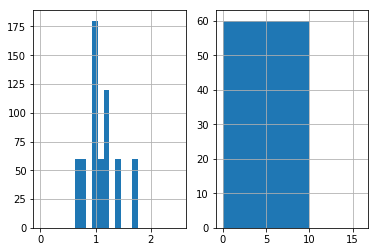

In [22]:

#MET2_joints[["MET","label"]].describe()
#MET2_joints["MET"].value_counts
#MET2_joints["label"].value_counts

plt.subplot(121)
MET2_joints["MET"].hist(bins=np.linspace(0., 2.5,25))
plt.subplot(122)
MET2_joints["label"].hist(bins=np.linspace(0., 16, 17))

In [23]:
#MET2_joints.info()
MET2_joints.to_csv("activity-met_n{}.csv".format(numClass), index = False, header = False)
#MET2_joints.to_csv("activity_wo.csv", index = False, header = False)

In [24]:
# count labels
label_bin = np.linspace(0,10,11)-1
MET2_joints["label"].value_counts(bins=label_bin, sort=False)


(-1.001, 0.0]    60
(0.0, 1.0]       60
(1.0, 2.0]       60
(2.0, 3.0]       60
(3.0, 4.0]       60
(4.0, 5.0]       60
(5.0, 6.0]       60
(6.0, 7.0]       60
(7.0, 8.0]       60
(8.0, 9.0]       60
Name: label, dtype: int64

# code below is for suffling

In [ ]:
# Now let's shuffle!


# 1. set aside TEST dataset
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(MET2_joints, MET2_joints["label"]):
    strat_train_set = MET2_joints.loc[train_index]
    strat_train_set.reset_index(drop=True, inplace=True) 
    
    #filename = "activity_wo_train.csv"
    filename = "activity_wo_ub_train.csv"
    #print(len(strat_train_set))
    strat_train_set.to_csv(filename, index = False, header = False)
    
    
    strat_test_set = MET2_joints.loc[test_index]
    strat_test_set.reset_index(drop=True, inplace=True)
    #filename = "activity_wo_test.csv"
    filename = "activity_wo_ub_test.csv"
    strat_test_set.to_csv(filename, index = False, header = False)    
    #print(len(strat_test_set))    
    
    print(strat_train_set["label"].value_counts(sort=False))
    print(strat_test_set["label"].value_counts(sort=False))
    

In [4]:
# load saved file
strat_train_set=pd.read_csv("activity_wo_ub_train.csv",header=None,names=colNames) # ,index_col=0)
strat_test_set=pd.read_csv("activity_wo_ub_test.csv",header=None,names=colNames) # ,index_col=0)

print(strat_train_set.shape)
print(strat_test_set.shape)

(485, 45)
(54, 45)


In [6]:

from sklearn.model_selection import StratifiedShuffleSplit
# 2. divide the TRAINING dataset into k-fold for cross-validation

num_split = 5
split = StratifiedShuffleSplit(n_splits=num_split, test_size=1/num_split, random_state=42)



k = 0
for train_index, test_index in split.split(strat_train_set, strat_train_set["label"]):
    
    strat_train_train_set = strat_train_set.loc[train_index]
    #filename = "activity_wo_train_k{}.csv".format(k)
    filename = "activity_wo_ub_train_k{}_{}.csv".format(k,num_split)
    #print(len(strat_train_set))
    strat_train_train_set.to_csv(filename, index = False, header = False)
    
    
    strat_val_set = strat_train_set.loc[test_index]
    #filename = "activity_wo_val_k{}.csv".format(k)    
    filename = "activity_wo_ub_val_k{}_{}.csv".format(k,num_split)    
    strat_val_set.to_csv(filename, index = False, header = False)    
    #print(len(strat_test_set))    
    
    print(strat_train_train_set["label"].value_counts(sort=False))
    print(strat_val_set["label"].value_counts(sort=False))
    
    k = k +1

# cp activity_wo_ub_train_k?_5.csv /var/data/MET2/
# cp activity_wo_ub_val_k?_5.csv /var/data/MET2/
# scp activity_wo_ub_train_k?_5.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity_wo_ub_val_k?_5.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity_wo_ub_train_k?_5.csv omega.inu.ac.kr:/var/data/MET2/
# scp activity_wo_ub_val_k?_5.csv omega.inu.ac.kr:/var/data/MET2/

0    42
1    43
2    41
3    27
4    43
5    42
6    38
7    27
8    43
9    42
Name: label, dtype: int64
0    11
1    11
2    10
3     6
4    11
5    11
6     9
7     7
8    11
9    10
Name: label, dtype: int64
0    42
1    43
2    41
3    27
4    43
5    42
6    38
7    27
8    43
9    42
Name: label, dtype: int64
0    11
1    11
2    10
3     6
4    11
5    11
6     9
7     7
8    11
9    10
Name: label, dtype: int64
0    42
1    43
2    41
3    26
4    43
5    43
6    38
7    27
8    43
9    42
Name: label, dtype: int64
0    11
1    11
2    10
3     7
4    11
5    10
6     9
7     7
8    11
9    10
Name: label, dtype: int64
0    43
1    43
2    41
3    26
4    43
5    42
6    38
7    27
8    43
9    42
Name: label, dtype: int64
0    10
1    11
2    10
3     7
4    11
5    11
6     9
7     7
8    11
9    10
Name: label, dtype: int64
0    42
1    43
2    41
3    26
4    43
5    43
6    38
7    27
8    43
9    42
Name: label, dtype: int64
0    11
1    11
2    10
3     7
4    11
5    1

In [ ]:
# TO CHECK 

#print(strat_train_set["label"].value_counts(bins=labels, sort=False))
#print(strat_test_set["label"].value_counts(bins=labels, sort=False))

plt.subplot(221)
MET2_joints["label"].hist()
plt.subplot(222)
strat_test_set["label"].hist()
plt.subplot(223)
strat_val_set["label"].hist()
plt.subplot(224)
strat_train_train_set["label"].hist()

In [ ]:
# check size

print(len(strat_train_set))
print(len(strat_test_set))


print(len(strat_train_train_set))
print(len(strat_val_set))


